In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline


In [4]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

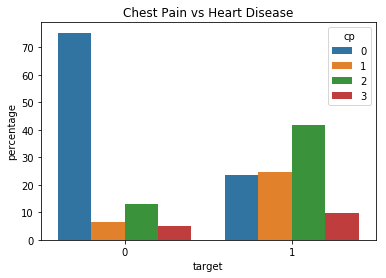

In [29]:
temp = (data.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "cp", data = temp)\
.set_title("Chest Pain vs Heart Disease")

Text(0.5, 1.0, 'Heart Disease')

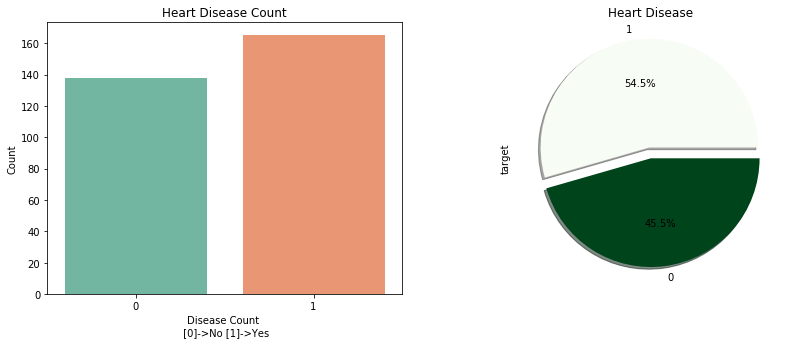

In [34]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease")

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

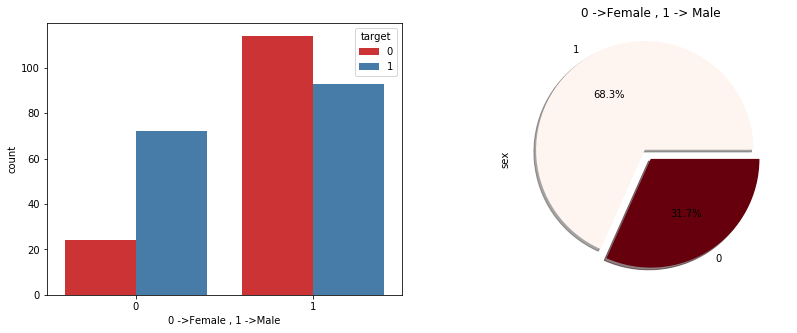

In [31]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

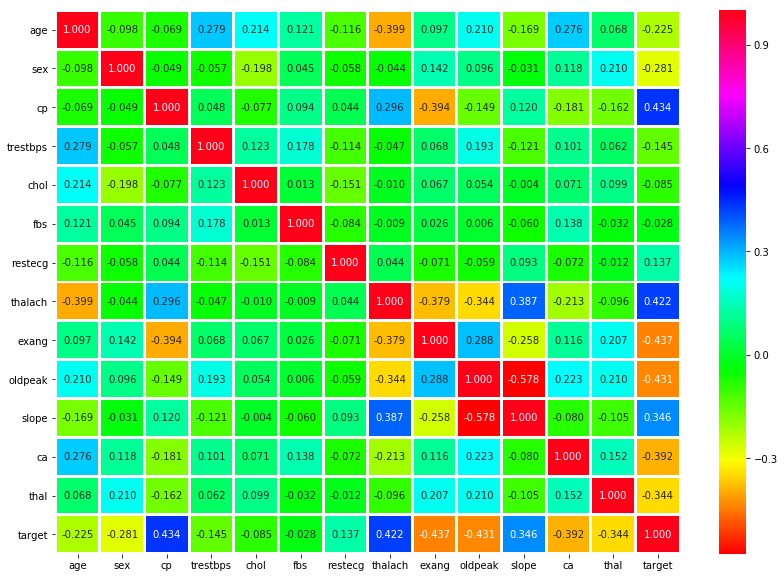

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [28]:
data.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [39]:
data_label=data['target']
del data['target']
data_label=pd.DataFrame(data_label)

In [40]:
data=pd.get_dummies(data,drop_first=True)
data.head(),data_label.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,    target
 0       1
 1       1
 2       1
 3       1
 4       1)

In [41]:
from sklearn.preprocessing import StandardScaler
data_scaled=StandardScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bimic\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.20,
                                             stratify=data_label,random_state=975456)


In [44]:
from sklearn.linear_model import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [45]:
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))